# College Major Implications

todo: add desciption

In [104]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib as plt

%matplotlib inline

In [15]:
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [16]:
recent_grads.tail()


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [17]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [19]:
# remove rows with missing data since matplotlib can't handle it

recent_data_count = len(recent_grads.index)
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads.index)

print(recent_data_count)
print(cleaned_data_count)

172
172


In [57]:
def get_scatter(x, y):
    recent_grads.plot(x=x, y=y, kind='scatter', title=str(x + ' vs. ' + y))

def get_hist(row, bins, x_min=0, x_max=5000):
    recent_grads[row].hist(bins=bins, range=(x_min, x_max))

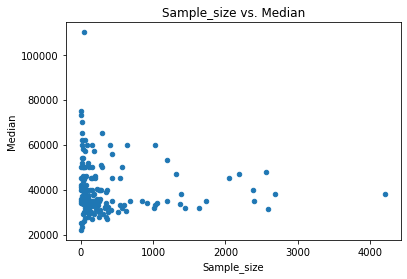

In [40]:
get_scatter('Sample_size', 'Median')

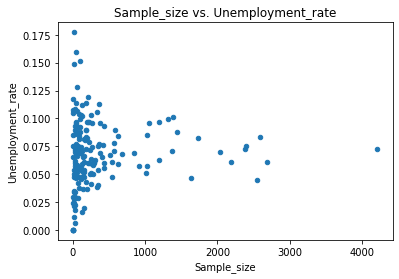

In [41]:
get_scatter('Sample_size', 'Unemployment_rate')

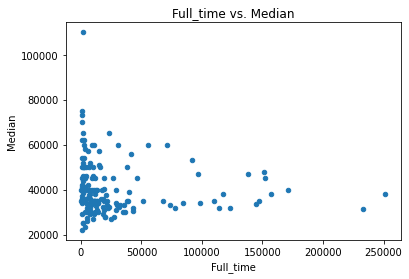

In [42]:
get_scatter('Full_time', 'Median')

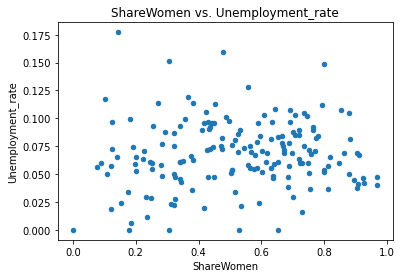

In [43]:
get_scatter('ShareWomen', 'Unemployment_rate')

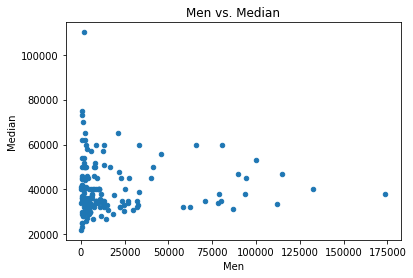

In [44]:
get_scatter('Men', 'Median')

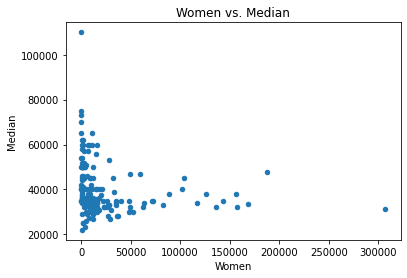

In [45]:
get_scatter('Women', 'Median')

### Initial Analysis

The Above scatter plots indicate that there is:

- slightly positive relationship between the number of Women in a major and the Median Income
- no coorelation between the share of women in a major and the unemployment rate
- Men have slightly higher median incomes than women (can i concluce this from separate scatter plots)
- A slightly negative correlation bewteen median income and full time positions aquired
- a slightly negative correlation between the popularity of a major and the unemployment rate


### Histograms

count     172.000000
mean      357.941860
std       619.680419
min         2.000000
25%        42.000000
50%       131.000000
75%       339.000000
max      4212.000000
Name: Sample_size, dtype: float64

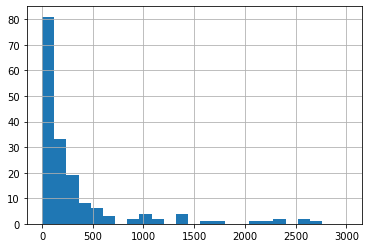

In [102]:
get_hist('Sample_size', 25, 0, 3000)
recent_grads['Sample_size'].describe()

count       172.000000
mean      40076.744186
std       11461.388773
min       22000.000000
25%       33000.000000
50%       36000.000000
75%       45000.000000
max      110000.000000
Name: Median, dtype: float64

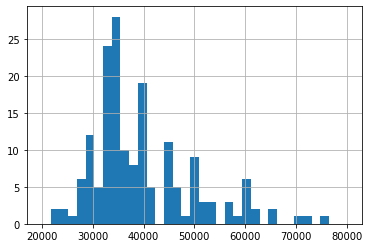

In [101]:
get_hist('Median', 35, 20000, 80000)
recent_grads['Median'].describe()

count       172.00000
mean      31355.80814
std       50777.42865
min           0.00000
25%        3734.75000
50%       12031.50000
75%       31701.25000
max      307933.00000
Name: Employed, dtype: float64

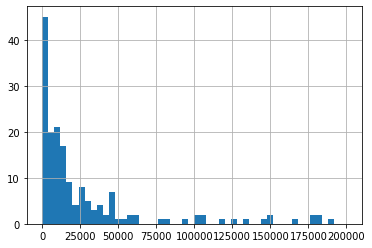

In [100]:
get_hist('Employed', 50, 0, 200000)

recent_grads['Employed'].describe()

count       172.000000
mean      26165.767442
std       42957.122320
min         111.000000
25%        3181.000000
50%       10073.500000
75%       25447.250000
max      251540.000000
Name: Full_time, dtype: float64

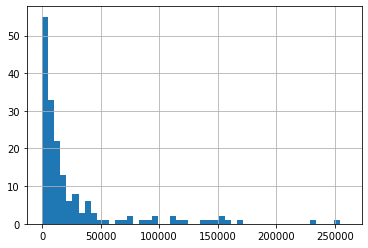

In [83]:
get_hist('Full_time', 50, 0, 260000)

recent_grads['Full_time'].describe()

count    172.000000
mean       0.522223
std        0.231205
min        0.000000
25%        0.336026
50%        0.534024
75%        0.703299
max        0.968954
Name: ShareWomen, dtype: float64

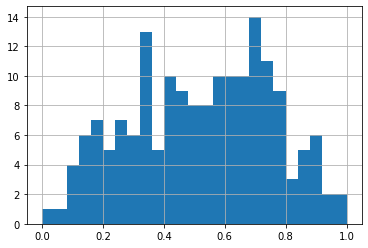

In [84]:
get_hist('ShareWomen', 25, 0, 1)

recent_grads['ShareWomen'].describe()

count    172.000000
mean       0.068024
std        0.030340
min        0.000000
25%        0.050261
50%        0.067544
75%        0.087247
max        0.177226
Name: Unemployment_rate, dtype: float64

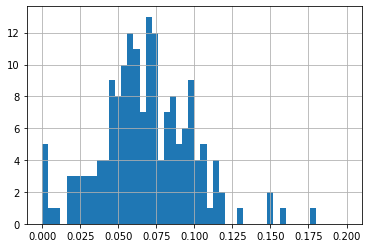

In [85]:
get_hist('Unemployment_rate', 50, 0, .2)

recent_grads['Unemployment_rate'].describe()

count       172.000000
mean      16723.406977
std       28122.433474
min         119.000000
25%        2177.500000
50%        5434.000000
75%       14631.000000
max      173809.000000
Name: Men, dtype: float64

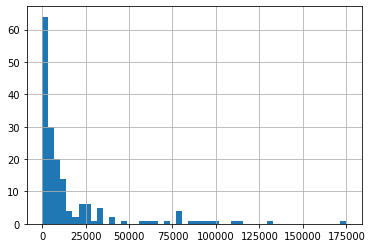

In [93]:
get_hist('Men', 50, 0, 175000)

recent_grads['Men'].describe()

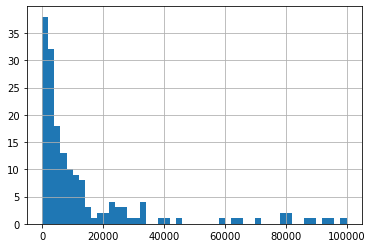

count       172.000000
mean      22646.674419
std       41057.330740
min           0.000000
25%        1778.250000
50%        8386.500000
75%       22553.750000
max      307087.000000
Name: Women, dtype: float64

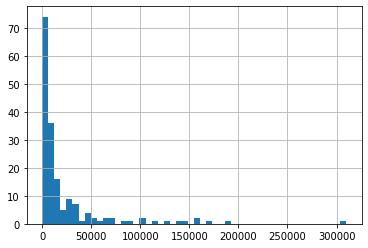

In [94]:
get_hist('Women', 50, 0, 310000)


recent_grads['Women'].describe()

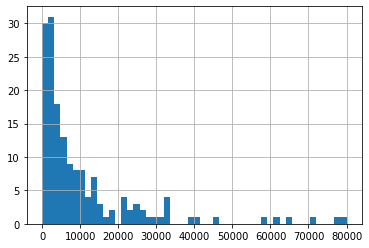

In [97]:
get_hist('Men', 50, 0, 80000)

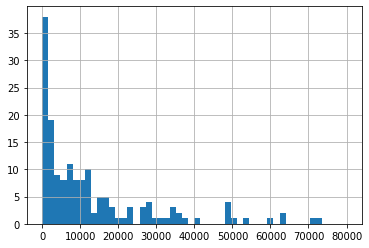

In [99]:
get_hist('Women', 50, 0, 80000)

## Analysis

About 33% of the sampled majors are predoninately Male and about 30% of the sampled majors are predoninately female.

The most common median salarty range for new grads is $30,000 - $40,000.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12d6defd0>,
      dtype=object)

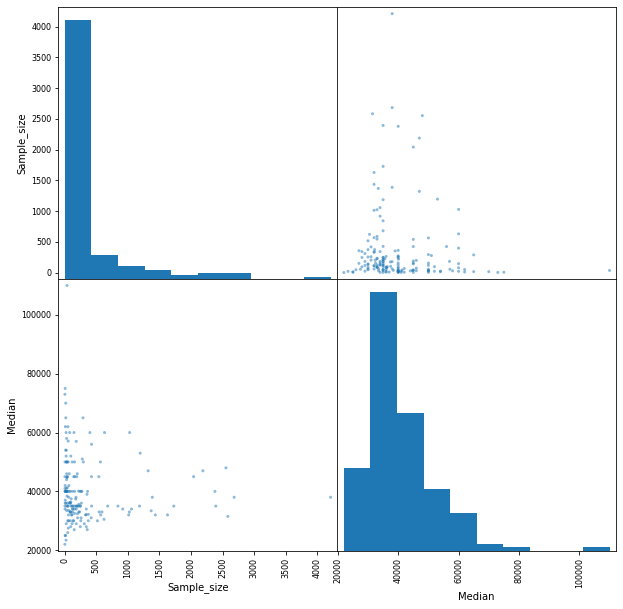

In [107]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12cd6a7b8>,
      dtype=object)

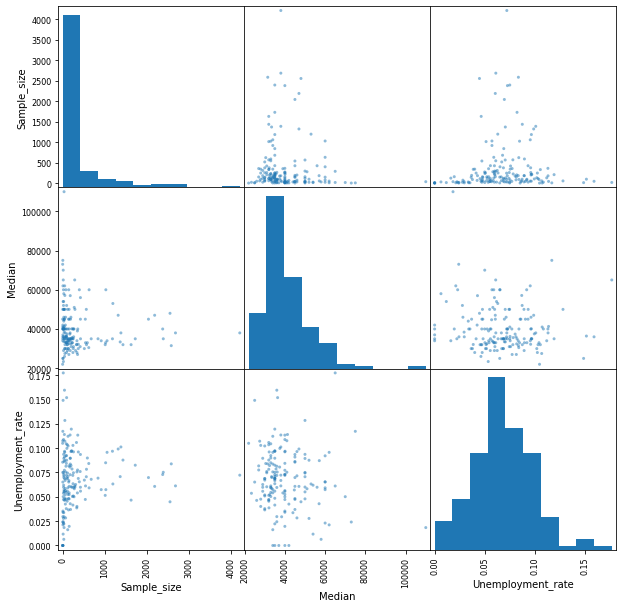

In [111]:
scatter_matrix(recent_grads[['Sample_size', 'Median','Unemployment_rate']], figsize=(10,10))

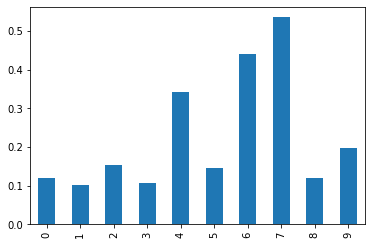

In [125]:
recent_grads[:10]['ShareWomen'].plot(kind='bar')

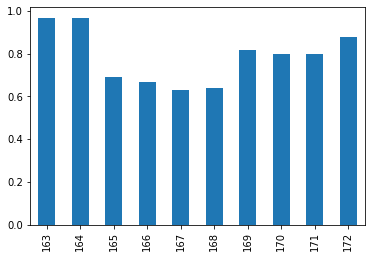

In [126]:
recent_grads[-10:]['ShareWomen'].plot(kind='bar')

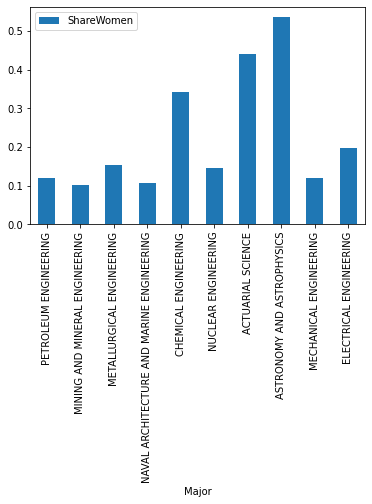

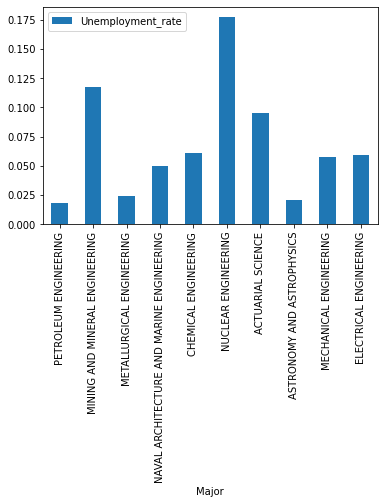

In [135]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')

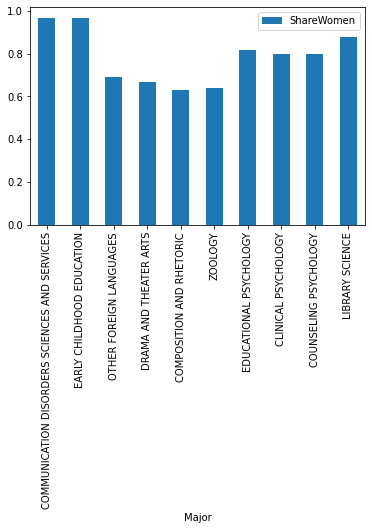

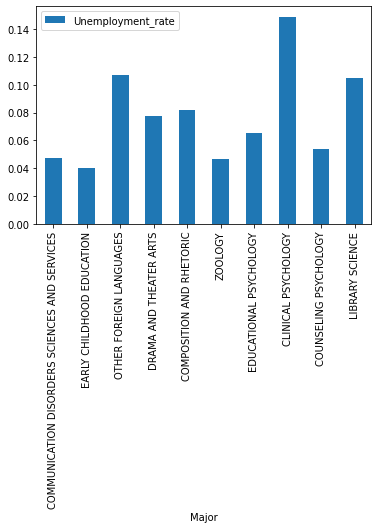

In [136]:
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate')

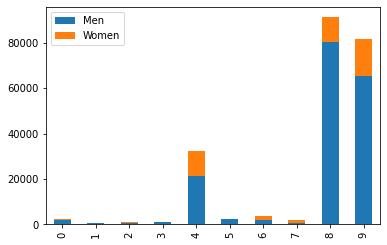

In [145]:
recent_grads[:10][["Men","Women"]].plot.bar(stacked=True)

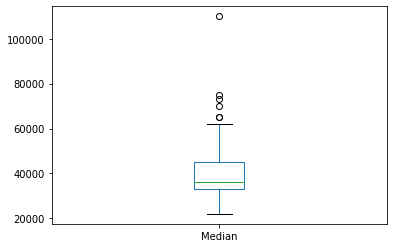

In [154]:
recent_grads[["Median"]].plot.box()

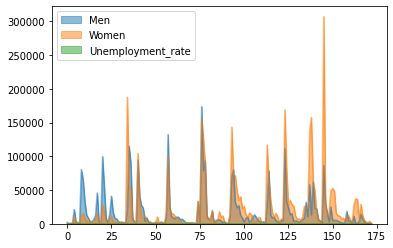

In [156]:
recent_grads[["Men","Women","Unemployment_rate"]].plot.area(stacked=False)